#Visualization

In [0]:
from google.colab import drive
drive.mount("./gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./gdrive/


### Review lengths

In [0]:
import pandas as pd

train_df = pd.read_json("./gdrive/My Drive/Amazon Review Dataset/train.json",lines= True)
test_df = pd.read_json("./gdrive/My Drive/Amazon Review Dataset/test.json",lines= True)
val_df = pd.read_json("./gdrive/My Drive/Amazon Review Dataset/valid.json",lines= True)

In [0]:
import matplotlib.pyplot as plt

def sentence_histogram(dataframe, max_len=None):
  if type(dataframe)==tuple:
    if len(dataframe)==2:
      t,v=dataframe
      t=t.iloc[:,-1].values
      v=v.iloc[:,-1].values
      temp=list(t)+list(v)
      
    elif len(dataframe)==3:
      t,v,ts=dataframe
      t=t.iloc[:,-1].values
      v=v.iloc[:,-1].values
      ts=ts.iloc[:,-1].values
      temp=list(t)+list(v)+list(ts)
    
    else:
      t=dataframe
      t=t.iloc[:,-1].values
      temp=list(t)
    
    lengths=[]
    
    if max_len:
      
      for i in temp:
        l=len(tokenizer(i))
        if l<=max_len:
            lengths.append(l)
            
    else:
      
      for i in temp:
        l=len(tokenizer(i))
        lengths.append(l)
    
    plt.hist(lengths, bins=100)
    plt.xlabel("length of the sentence")
    plt.ylabel("Frequency")
    plt.show()
    
    
    return lengths

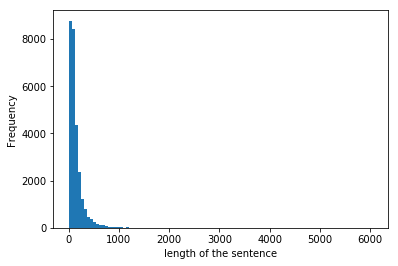

longest sentence in the data:  6055  tokens
Total no. of sentences:  27780


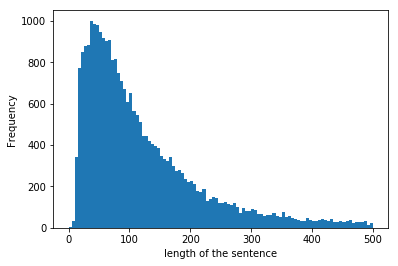

no. of sentences with less than 500 words:  26900


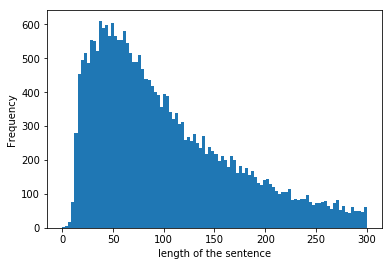

no. of sentences with less than 300 words:  25149


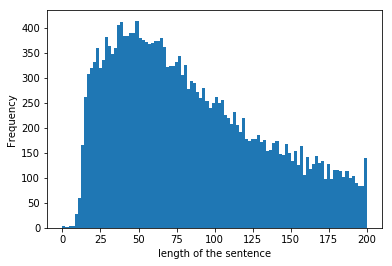

no. of sentences with less than 200 words:  22503


In [0]:
len_list1=sentence_histogram((train_df,val_df,test_df))
print("longest sentence in the data: ",max(len_list1)," tokens")
print("Total no. of sentences: ",len(len_list1))

len_list2=sentence_histogram((train_df,val_df,test_df), max_len=500)
print("no. of sentences with less than 500 words: ",len(len_list2))

len_list3=sentence_histogram((train_df,val_df,test_df), max_len=300)
print("no. of sentences with less than 300 words: ",len(len_list3))

len_list4=sentence_histogram((train_df,val_df,test_df), max_len=200)
print("no. of sentences with less than 200 words: ",len(len_list4))

**hence the max lenth was safely assumed to be 2000**

###Accuracies wrt different hyperparameters 

Max review length:  None

	  layers=1 		 layer=2


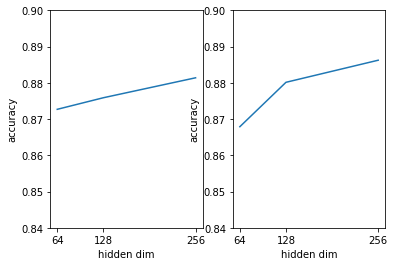


Max review length:  2000

	  layers=1 		 layer=2


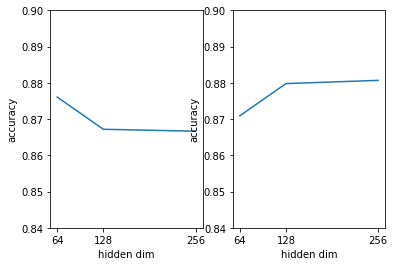


Max review length:  1000

	  layers=1 		 layer=2


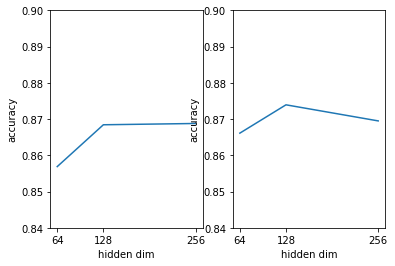


Max review length:  500

	  layers=1 		 layer=2


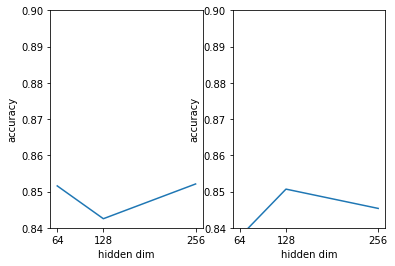

In [0]:
import matplotlib.pyplot as plt
import json

epoch=[i for i in range(1,31)]
hidden_dims=[64,128,256]

for max_len in [None,2000,1000,500]:
  print("Max review length: ",max_len)
  print()
  print("\t  layers=1 \t\t layer=2")
  for layer,subplot in zip([1,2],[121,122]):
    dicts=[]
    for hidden in hidden_dims:
      with open("history.max_len="+str(max_len)+".hidden="+str(hidden)+".layers="+str(layer)+".linear=256.json",'r') as file:
        dicts.append(json.load(file))
    
    
    #print("No. of LSTM layers: ",layer)
    
    plt.subplot(subplot)
    plt.plot(hidden_dims,[dicts[i]["test accuracy"] for i in range(3)])
    plt.xticks(hidden_dims)
    plt.ylim(0.84,0.90)
    plt.ylabel("accuracy")
    plt.xlabel("hidden dim")
  plt.show()
  print()

It is observable that increasing the no. of layers and review length certainly enhances the performance. Though with smaller models, the behavioral changes are unpredictable, the models with larger vocab size and layers show promising increase in performance with increase in hidden dimensions for the LSTMs.

The best performance is obtained by using the unretricted review length, 2 layer bi-LSTM with hidden dimensions of size 256.

###Training Curves (previous work; without regularization)

Max review length:  None
layers:  1
hidden dim:
           64		128	     256


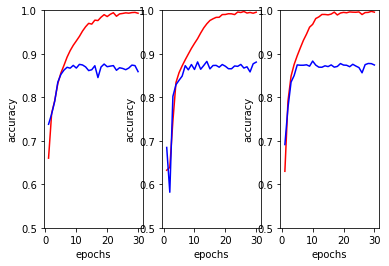



layers:  2
hidden dim:
           64		128	     256


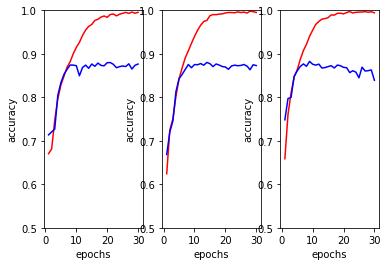



Max review length:  2000
layers:  1
hidden dim:
           64		128	     256


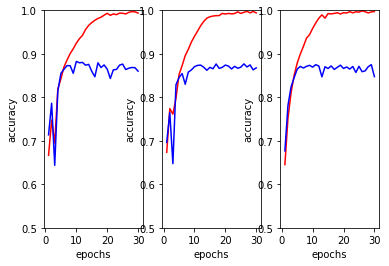



layers:  2
hidden dim:
           64		128	     256


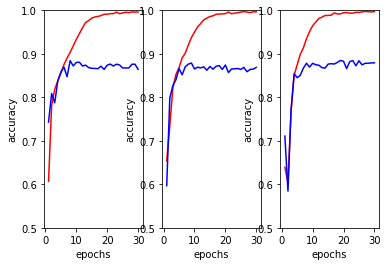



Max review length:  1000
layers:  1
hidden dim:
           64		128	     256


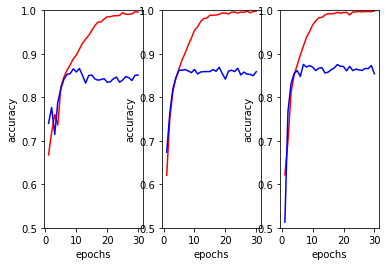



layers:  2
hidden dim:
           64		128	     256


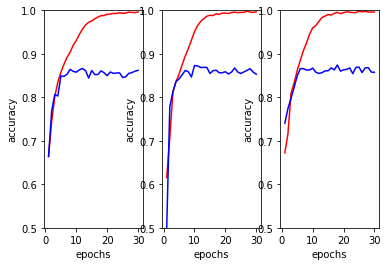



Max review length:  500
layers:  1
hidden dim:
           64		128	     256


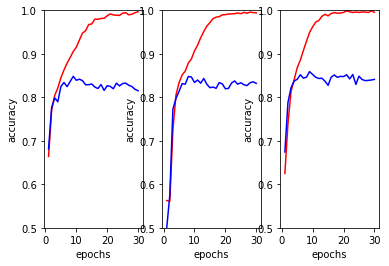



layers:  2
hidden dim:
           64		128	     256


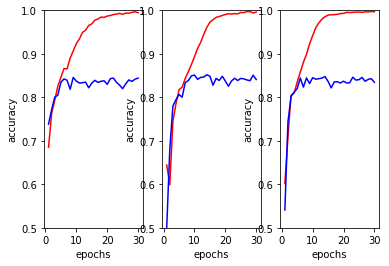

In [0]:
for max_len in [None,2000,1000,500]:
  print("Max review length: ",max_len)
  for layer in [1,2]:
    print("layers: ",layer)
    print("hidden dim:")
    print("           64\t\t128\t     256")
    for hidden,subplot in zip(hidden_dims,[131,132,133]):
      with open("history.max_len="+str(max_len)+".hidden="+str(hidden)+".layers="+str(layer)+".linear=256.json",'r') as file:
        dic=json.load(file)
    
    
      
    
      plt.subplot(subplot)
      plt.plot(epoch,dic["training accuracy"] ,'r' )
      plt.plot(epoch,dic["val accuracy"] ,'b' )
      plt.xticks(range(0,31,10))
      plt.ylim(0.5,1)
      plt.ylabel("accuracy")
      plt.xlabel("epochs")
    plt.show()
    print()
    print()

###Learning rate

Configuration:
	 hidden dimension:256 
	 no. of layers:3 
	 alpha:0.001
learning rate:  0.0003


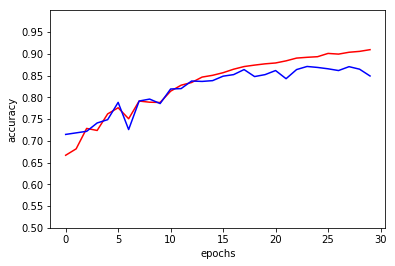

learning rate:  0.001


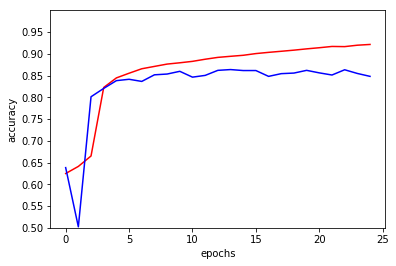

learning rate:  0.003


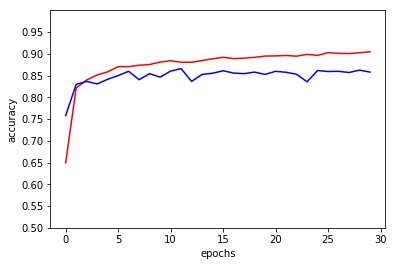

learning rate:  0.01


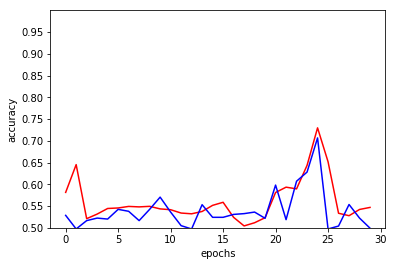

learning rate:  0.03


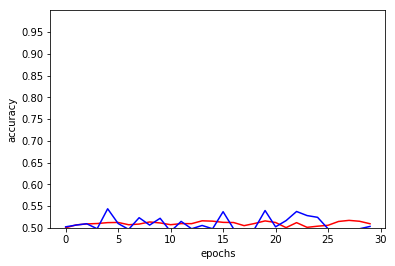

In [0]:
import matplotlib.pyplot as plt
import json

hidden=256
max_len=None
layer=3
alpha=0.001


print("Configuration:\n\t hidden dimension:256 \n\t no. of layers:3 \n\t alpha:0.001\n")

for lr in [0.0003,0.001,0.003,0.01,0.03]:
      with open("history.max_len="+str(max_len)+".hidden="+str(hidden)+".layers="+str(layer)+".alpha="+str(alpha)+".lr="+str(lr)+".json",'r') as file:
        dic=json.load(file)
    
    
      print("learning rate: ",lr)
    
      
      plt.plot([i for i in range(len(dic["training accuracy"]))],dic["training accuracy"] ,'r' )
      plt.plot([i for i in range(len(dic["training accuracy"]))],dic["val accuracy"] ,'b' )
      plt.xticks(range(0,len(dic["training accuracy"])+1,5))
      plt.yticks([i/100 for i in range(50,100,5)])
      plt.ylim(0.5,1)
      plt.ylabel("accuracy")
      plt.xlabel("epochs")
      plt.show()

### Ragularization Parameter (alpha)

Configuration:
	 hidden dimension:256 
	 no. of layers:3 
	 learning rate:0.003
alpha:  0.0001


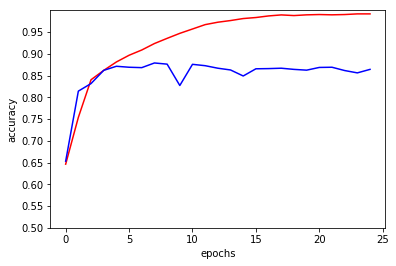

alpha:  0.0003


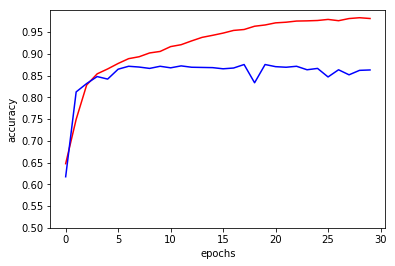

alpha:  0.001


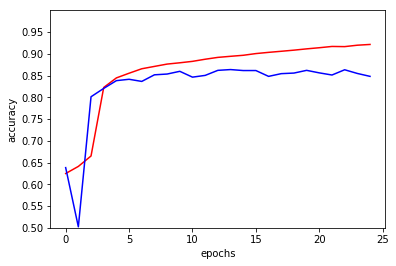

alpha:  0.003


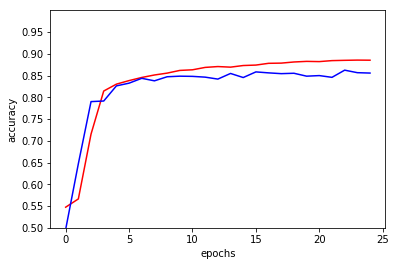

alpha:  0.01


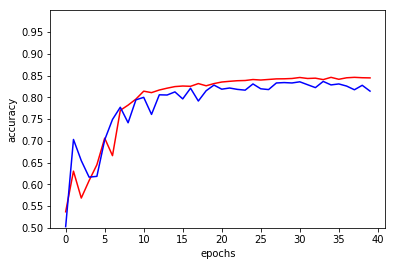

alpha:  0


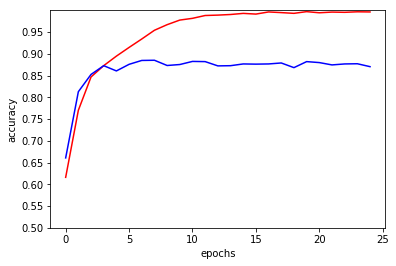

In [0]:
import matplotlib.pyplot as plt
import json

print("Configuration:\n\t hidden dimension:256 \n\t no. of layers:3 \n\t learning rate:0.003")



hidden=256
max_len=None
layer=3
lr=0.001


for alpha in [0.0001,0.0003,0.001,0.003,0.01,0]:
      with open("history.max_len="+str(max_len)+".hidden="+str(hidden)+".layers="+str(layer)+".alpha="+str(alpha)+".lr="+str(lr)+".json",'r') as file:
        dic=json.load(file)
        
      print("alpha: ", alpha)
    
      
      plt.plot([i for i in range(len(dic["training accuracy"]))],dic["training accuracy"] ,'r' )
      plt.plot([i for i in range(len(dic["training accuracy"]))],dic["val accuracy"] ,'b' )
      plt.xticks(range(0,len(dic["training accuracy"])+1,5))
      plt.yticks([i/100 for i in range(50,100,5)])
      plt.ylim(0.5,1)
      plt.ylabel("accuracy")
      plt.xlabel("epochs")
      plt.show()

###Dropout (between subsequent LSTM layers)

Configuration:
	 hidden dimension:256 
	 no. of layers:3 
	 learning rate:0.003

dropout:  0


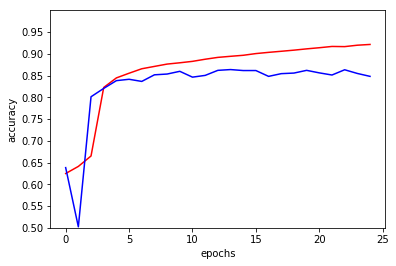

dropout:  0.1


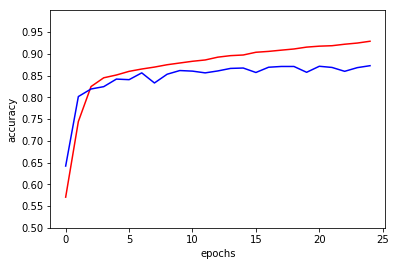

dropout:  0.2


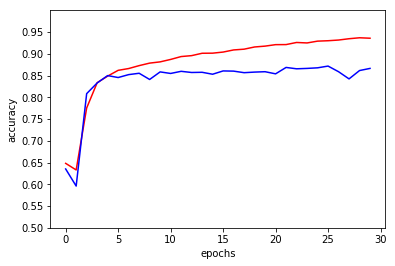

In [0]:
import matplotlib.pyplot as plt
import json

hidden=256
max_len=None
layer=3
lr=0.001
alpha=0.001

print("Configuration:\n\t hidden dimension:256 \n\t no. of layers:3 \n\t learning rate:0.003\n")



for dropout in [0,0.1,0.2]:
      with open("history.max_len="+str(max_len)+".hidden="+str(hidden)+".layers="+str(layer)+".alpha="+str(alpha)+".lr="+str(lr)+".dropout="+str(dropout)+".json",'r') as file:
        dic=json.load(file)
        
      print("dropout: ", dropout)
    
      
      plt.plot([i for i in range(len(dic["training accuracy"]))],dic["training accuracy"] ,'r' )
      plt.plot([i for i in range(len(dic["training accuracy"]))],dic["val accuracy"] ,'b' )
      plt.xticks(range(0,len(dic["training accuracy"])+1,5))
      plt.yticks([i/100 for i in range(50,100,5)])
      plt.ylim(0.5,1)
      plt.ylabel("accuracy")
      plt.xlabel("epochs")
      plt.show()

**The dropout keeps reducing the overall peak accuracy of the model and is therefore not used in the final model.**

##Final Configuration



> **Layers:** 3 

>**hidden dimension:** 256

>**alpha:** 0.003

>**lr:** 0.003

>**Max sentence length:** unbound (i.e. no limit)

>**batch size**: 64 ( or 32 )

>**Dropout**: 0.1

>**number of dense layers:** 2









#Domain wise Training

Here each row denotes the accuracies for the domain in that row, while different columns denoted the domains they have been trained with, i.e. the supporting domain. Diagonal entries are accuracies for domains trained individually.

For example- accuracy for apparel when trained with books is in row 1 coulmn 2 and when trained with baby is in row 1 column 5. 

**It can be observed that the training with other domains usually helps in comparison to training the domain individually.*

In [0]:
from IPython.display import display
import pandas as pd

df=pd.read_csv("domains.csv")

print(display(df))

,Unnamed: 0,apparel,books,sports_outdoors,toys_games,baby,music
0,apparel,0.8221,0.8142,0.8567,0.8629,0.8526,0.8437
1,books,0.7243,0.7527,0.8149,0.7283,0.7407,0.7956
2,sports_outdoors,0.8293,0.7764,0.7139,0.7861,0.7884,0.8028
3,toys_games,0.8317,0.8028,0.8605,0.7836,0.8389,0.8312
4,baby,0.8147,0.8052,0.8028,0.8197,0.7475,0.7860
5,music,0.8125,0.8137,0.7283,0.8125,0.7836,0.7235


None
